In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

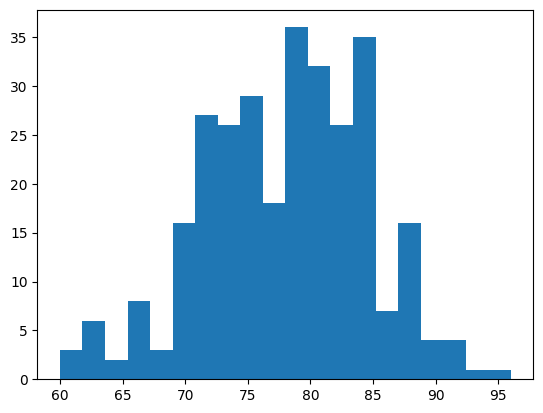

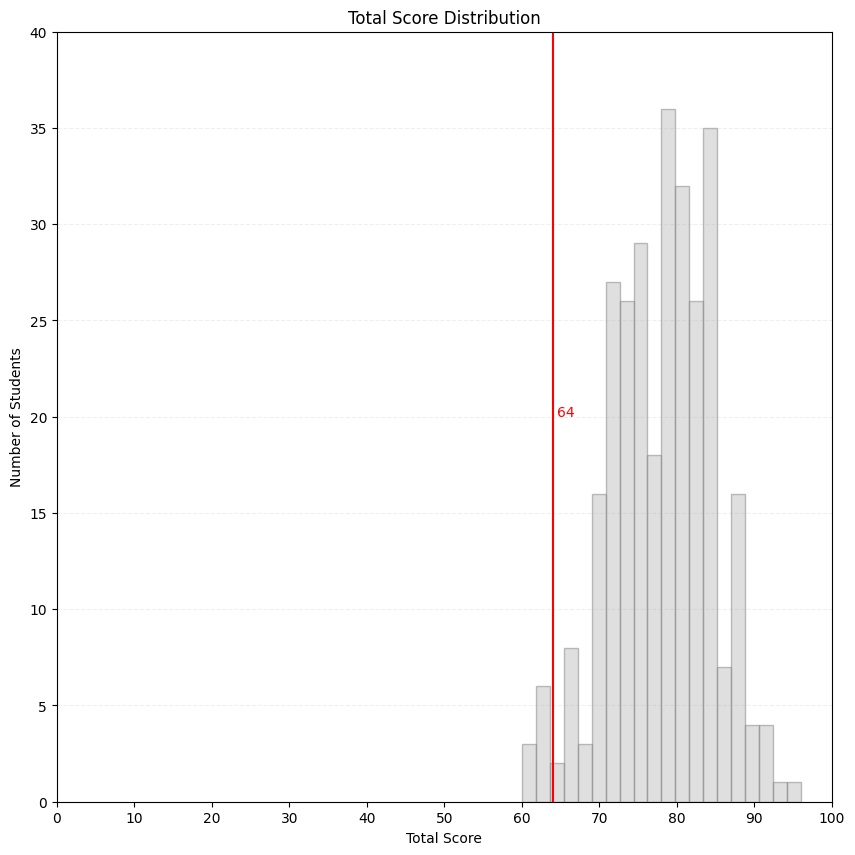

In [10]:
# ---
# Group No. 1
# 1. นาย พศิน บุญชู 6410450532
# 2. นาย ณัฐภัทร ภารกุล 6410451644
# 3. นาย นิธิภัทร เบญจม์ภัทร 6410451725
# ---

group = 1 # กลุ่มที่ 1
problem = 3 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# นำคะแนนส่วนต่างๆ มาคำนวณ
data["Total"] = ((data['HW1']*0.25)+(data['HW2']*0.25)+(data["Final"]*0.5))
data["Total"] = data["Total"].apply(np.ceil) # คะแนนรวมที่ได้ปัดเศษขึ้น
data = data.sort_values(by="Total", ascending=False) # เรียงข้อมูล
Mean = data["Total"].mean() # หาค่าเฉลีี่ย
Std = data["Total"].std() # หาส่วนเบี่ยงเบนมาตรฐาน
cutoff = int((Mean - (2*Std))//1) # ค่าที่ได้จะปัดเศษลง

# สร้างเงื่อนไขการแยกเกรด
def GPA(point):
  if point >= cutoff:
        return "S"
  else:
        return "U"

data["Grade"] = data["Total"].apply(GPA)

# สร้างค่ามานับขอบเขตของ y

frequencies = plt.hist(data["Total"], bins=20)

Yaxis = frequencies[0]
Yaxis = Yaxis.max()
Yaxis = ((Yaxis//5)+1)*5



# plot กราฟ
# กำหนดขนาดกราฟ
plt.figure(figsize=(10, 10))
# สร้างเส้นเกณฑ์คะแนนขั้นต่ำ
plt.axvline(x=cutoff, color='red' )
# สร้างข้อความ คะแนนขั้นต่ำ
plt.text(cutoff+0.5, Yaxis/2, str(cutoff), rotation=0, fontsize=10, color='red')
# สร้าง ฮิตโตรแกรม
plt.hist(data['Total'],bins=20, edgecolor="grey", color="silver", alpha=0.5)
# กำหนดค่าในช่วงแกน X
plt.xlim(0,100)
# กำหนดความยาวและการแบ่งช่วงแกน Y
plt.yticks(range(0,int(Yaxis+1),5))
# กำหนดความยาวและการแบ่งช่วงแกน X
plt.xticks(range(0, 101,10))
# กำหนดชื่อแกน X
plt.xlabel('Total Score')
# กำหนดชื่อแกน Y
plt.ylabel('Number of Students')
# กำหนดชื่อแผนภูมิ histogram
plt.title('Total Score Distribution')
# กำหนดเส้นประแบ่งช่วงในแกน Y
plt.grid(True, axis='y',alpha=0.2,linestyle='--')



# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()